# Bike Sharing Assignment

In [129]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [130]:
#Importing dataset
bike_sharing = pd.read_csv('day.csv')

In [131]:
# Check top  rows of dataframe
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [132]:
# drop casual and registered variables due to redundancy
bike_sharing=bike_sharing.drop(columns=['casual', 'registered'])

In [133]:
#check for missing values
bike_sharing.isnull().mean()

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
cnt           0.0
dtype: float64

In [134]:
#checking shape of dataset
bike_sharing.shape

(730, 14)

## Data visualization

In [135]:
num_vars=['temp','atemp','hum','windspeed','cnt']
cat_vars=['season','yr','mnth','holiday','weekday','workingday','weathersit']
imp_vars=['season','yr','mnth','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed','cnt']

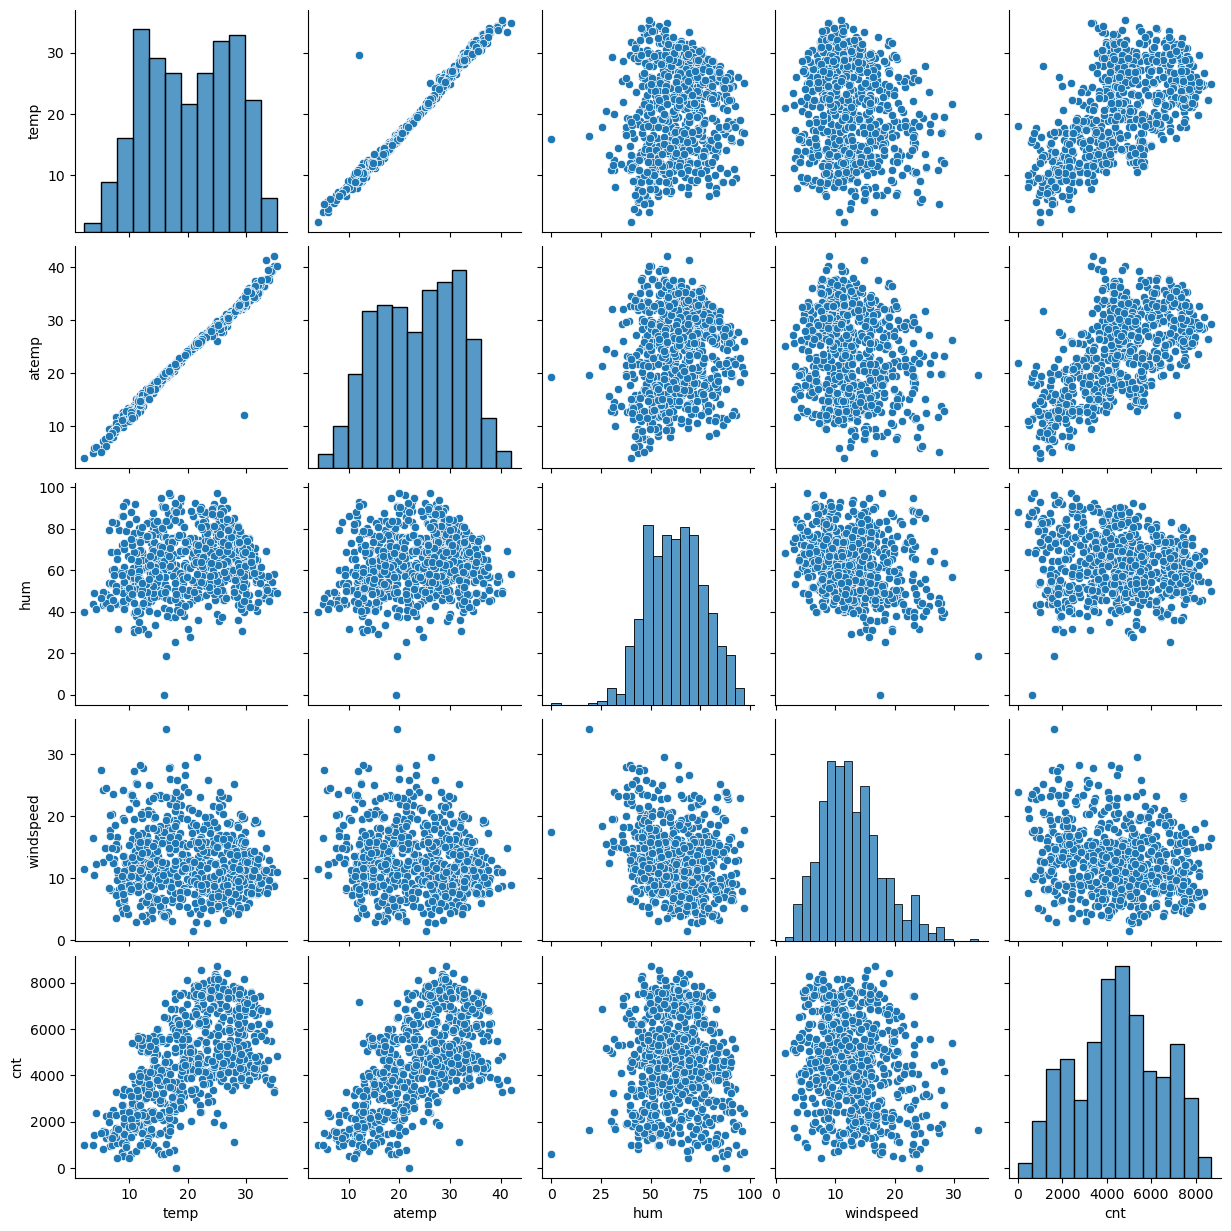

In [137]:
# plotting continuous variables
sns.pairplot(bike_sharing[num_vars])
plt.show()

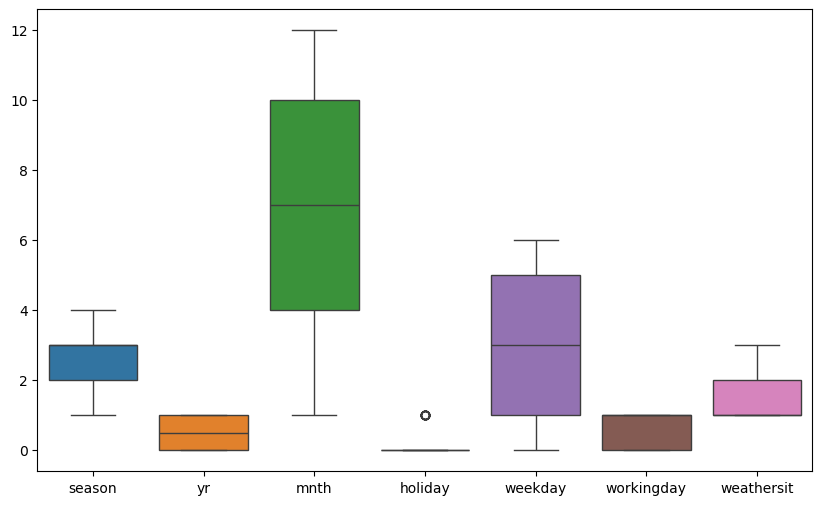

In [138]:
# plotting categorical variables
plt.figure(figsize=(10, 6))

sns.boxplot(bike_sharing[cat_vars])
plt.show()

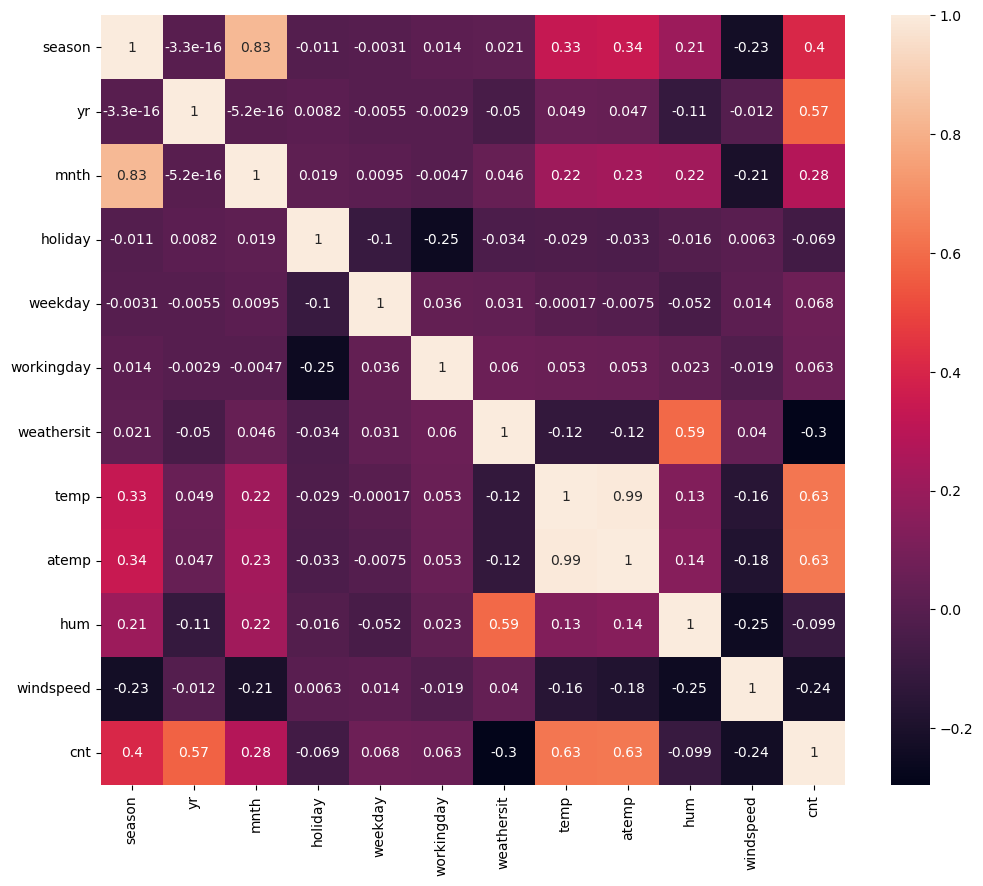

In [139]:
# checking correlation
plt.figure(figsize=(12, 10))
sns.heatmap(bike_sharing[imp_vars].corr(), annot=True)
plt.show()

# Pre-processing Steps

In [141]:
#mapping season variable
bike_sharing['season']=bike_sharing['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [142]:
#mapping mnth variable
bike_sharing['mnth']=bike_sharing['mnth'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})


In [143]:
#mapping weekday variable
bike_sharing['weekday']=bike_sharing['weekday'].map({0:'Sun',1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu',5:'Fri',6:'Sat'})

In [144]:
#mapping weathersit variable
bike_sharing['weathersit']=bike_sharing['weathersit'].map({1:'Clear', 2:'Mist', 3:'Light Snow', 4:'Heavy Rain'})

In [149]:
# creating dummy variable for season variable
season_dum=pd.get_dummies(bike_sharing['season'],drop_first=True,dtype=int)

In [154]:
# concating bike_sharing dataframe with season_dum dataframe
bike_sharing=pd.concat([bike_sharing,season_dum],axis=1)

In [156]:
# drop season variable
bike_sharing=bike_sharing.drop(columns=['season'])

In [157]:
# creating dummy variable for mnth variable
mnth_dum=pd.get_dummies(bike_sharing['mnth'],drop_first=True,dtype=int)

In [158]:
# concating bike_sharing dataframe with mnth_dum dataframe
bike_sharing=pd.concat([bike_sharing,mnth_dum],axis=1)

In [159]:
# drop mnth variable
bike_sharing=bike_sharing.drop(columns=['mnth'])

In [160]:
# creating dummy variable for weekday variable
weekday_dum=pd.get_dummies(bike_sharing['weekday'],drop_first=True,dtype=int)

In [161]:
# concating bike_sharing dataframe with weekday_dum dataframe
bike_sharing=pd.concat([bike_sharing,weekday_dum],axis=1)

In [162]:
# drop weekday variable
bike_sharing=bike_sharing.drop(columns=['weekday'])

In [163]:
# creating dummy variable for weathersit variable
weathersit_dum=pd.get_dummies(bike_sharing['weathersit'],drop_first=True,dtype=int)

In [164]:
# concating bike_sharing dataframe with weathersit_dum dataframe
bike_sharing=pd.concat([bike_sharing,weathersit_dum],axis=1)

In [165]:
# drop weathersit variable
bike_sharing=bike_sharing.drop(columns=['weathersit'])

In [166]:
# drop dteday,instant variable
bike_sharing=bike_sharing.drop(columns=['dteday','instant'])

In [173]:
# checking dataframe shape
bike_sharing.shape

(730, 30)

## Train-Test Split

In [198]:
# getting train and test data
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(bike_sharing, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features using MinMax scaling.


In [199]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [200]:
bike_sharing.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'spring', 'summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul',
       'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Mon', 'Sat', 'Sun', 'Thu',
       'Tue', 'Wed', 'Light Snow', 'Mist'],
      dtype='object')

In [201]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,0,1


### Dividing into X and Y sets for the model building

In [202]:
y_train = df_train.pop('cnt')
X_train = df_train


In [203]:
y_train.shape

(510,)

## Building our model using RFE

In [204]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [205]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
rfe = RFE(lm,n_features_to_select=10)             # running RFE
rfe=rfe.fit(X_train,y_train)
rfe.support_

array([ True,  True, False,  True, False,  True,  True,  True, False,
        True, False, False, False, False,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
        True, False])

In [206]:
selected_features=X_train.columns[rfe.support_]
print(selected_features)

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'winter', 'Jul',
       'Sep', 'Light Snow'],
      dtype='object')


## Modelling using statsmodel to check parameters

In [207]:
X_train=X_train[selected_features]

In [208]:
import statsmodels.api as sm
X_train_sm=sm.add_constant(X_train)#X_train_sm["const"]=1

In [209]:
model1=sm.OLS(np.array(y_train),X_train_sm)
res1=model1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     242.9
Date:                Tue, 25 Jun 2024   Prob (F-statistic):          1.53e-184
Time:                        13:46:16   Log-Likelihood:                 489.69
No. Observations:                 510   AIC:                            -957.4
Df Residuals:                     499   BIC:                            -910.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3769      0.031     12.133      0.000       0.316       0.438
yr             0.2281      0.008     27.102      0.000       0.212       0.245
holiday       -0.0920      0.026     -3.472      0.001      -0.144      -0.040
temp           0.5147      0.031     16.542      0.000       0.454       0.576
hum           -0.2728      0.032     -8.542      0.000      -0.336      -0.210
windspeed     -0.1887      0.026     -7.194      0.000      -0.240      -0.137
spring        -0.1005      0.015     -6.536      0.000      -0.131      -0.070
winter         0.0653      0.013      5.153      0.000       0.040       0.090
Jul           -0.0805      0.018     -4.538      0.000      -0.115      -0.046
Sep            0.0598      0.016      3.723      0.000       0.028       0.091
Light Snow    -0.1980      0.026     -7.659      0.000      -0.249      -0.147
==============================================================================
Omnibus:                       51.023   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.492
Skew:                          -0.593   Prob(JB):                     1.51e-22
Kurtosis:                       4.823   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [210]:
# clculating VIF for all variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) 
                 for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,56.127280
1,yr,1.029157
2,holiday,1.014404
3,temp,2.865568
4,hum,1.259791
5,windspeed,1.150991
6,spring,2.532017
7,winter,1.745159
8,Jul,1.294099
9,Sep,1.107744


In [222]:
# checking VIF using r2_score method
from sklearn.metrics import r2_score
r2_score(y_train, y_train_pred)

0.8295534066833782

### Residual Analysis of the train data

In [211]:
y_train_pred = res1.predict(X_train_sm)

Text(0.5, 0, 'Errors')

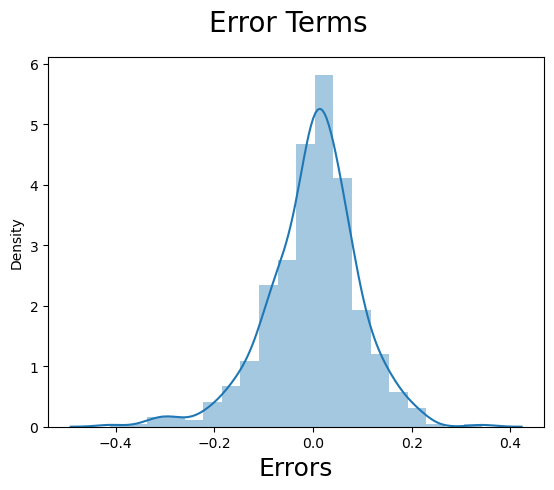

In [212]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)         

## Making Predictions on test data

#### Applying the scaling on the test sets

In [213]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

#### Dividing into X_test and y_test

In [215]:
y_test = df_test['cnt']
X_test=df_test[selected_features]

In [218]:
# Adding a constant variable 
X_test_sm = sm.add_constant(X_test)

In [219]:
# Making predictions using the model
y_pred_test = res1.predict(X_test_sm)

In [223]:
# getting r2_score on test data
r2_score(y_test, y_pred_test)

0.8177513196533346